In [2]:
import csv
import collections
import networkx as nx
import itertools
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#'allData' stores the raw data from the CSV file
allData=[]

#'attributes' stores the attribute names only
attributes=[]

#'movies' stores all attributes of each movie
movies=[]

with open('IMDB-Movie-Data.csv', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        allData.append(row)
        
attributes=allData[0]
movies=allData[1:]

In [4]:
attributes

['Rank',
 'Title',
 'Genre',
 'Description',
 'Director',
 'Actors',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [5]:
#Delete spaces from beginning of names
for n in movies:
    n[5]=n[5].replace(", ", ",")

In [6]:
#Example for a movie instance
movies[0]

['1',
 'Guardians of the Galaxy',
 'Action,Adventure,Sci-Fi',
 'A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.',
 'James Gunn',
 'Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana',
 '2014',
 '121',
 '8.1',
 '757074',
 '333.13',
 '76']

In [7]:
#'actors' stores actors/actresses the number of times they appeared in 'movies'
actors=[]

for n in movies:
    actorsPerMovie=n[5].split(',')
    actors+=actorsPerMovie

In [109]:
uniqueActors=[]
for n in set(actors):
    uniqueActors.append(n)

In [110]:
print "The number of unique actors/actresses is %d" %len(uniqueActors)

The number of unique actors/actresses is 1985


In [9]:
#'directors' stores directors the number of times they appeared in 'movies'
directors=[]

for n in movies:
    directorsPerMovie=n[4].split(',')
    directors+=directorsPerMovie

In [112]:
uniqueDirectors=[]
for n in set(directors):
    uniqueDirectors.append(n)

In [113]:
print "The number of unique directors is %d" %len(uniqueDirectors)

The number of unique directors is 644


In [194]:
#Find the top10 actor with the highest number of movies
counts = collections.Counter(actors)
mostCommon = counts.most_common()

print "The top 10 actors/actresses with the most movie appearances:"
for n in range (0,11):
    print mostCommon[n]

The top 10 actors/actresses with the most movie appearances:
('Mark Wahlberg', 15)
('Hugh Jackman', 14)
('Christian Bale', 13)
('Brad Pitt', 13)
('Johnny Depp', 12)
('Michael Fassbender', 12)
('Channing Tatum', 12)
('Tom Hardy', 12)
('Anne Hathaway', 12)
('Scarlett Johansson', 12)
('Robert Downey Jr.', 12)


In [12]:
#Find the top10 directors with the highest number of movies
counts = collections.Counter(directors)
mostCommon = counts.most_common()

print "The top 10 directors with the most movies:"
for n in range (0,16):
    print mostCommon[n]

The top 10 directors with the most movies:
('Ridley Scott', 8)
('Paul W.S. Anderson', 6)
('M. Night Shyamalan', 6)
('David Yates', 6)
('Michael Bay', 6)
('Peter Berg', 5)
('Justin Lin', 5)
('Danny Boyle', 5)
('David Fincher', 5)
('Zack Snyder', 5)
('Martin Scorsese', 5)
('Woody Allen', 5)
('Denis Villeneuve', 5)
('Christopher Nolan', 5)
('J.J. Abrams', 5)
('Antoine Fuqua', 5)


In [14]:
#Create 'IMDB social network' graph
G = nx.Graph(Title="IMDB social network")

In [15]:
G.graph

{'Title': 'IMDB social network'}

In [16]:
#Add all actors/actresses to the graph as nodes
G.add_nodes_from(set(actors), Type='actor/actress')

In [17]:
len(G.nodes())

1985

In [18]:
#Add all directors to the graph as nodes
G.add_nodes_from(set(directors), Type='director')

In [19]:
len(G.nodes())

2593

In [20]:
#Create a list for each movie that contains every actor and the director
staffPerMovie=[]
counter=0
for n in movies:
    actorList=n[5].split(',')
    staffPerMovie.append([])
    staffPerMovie[counter]=actorList
    staffPerMovie[counter].append(n[4])
    counter+=1
print staffPerMovie[0]

['Chris Pratt', 'Vin Diesel', 'Bradley Cooper', 'Zoe Saldana', 'James Gunn']


In [23]:
#Map out every unique relationship per movie
relationshipsPerMovie=[]

for n in staffPerMovie:
    relationshipsPerMovie.append(list(itertools.combinations(n, 2)))

In [24]:
relationshipsPerMovie[1]

[('Noomi Rapace', 'Logan Marshall-Green'),
 ('Noomi Rapace', 'Michael Fassbender'),
 ('Noomi Rapace', 'Charlize Theron'),
 ('Noomi Rapace', 'Ridley Scott'),
 ('Logan Marshall-Green', 'Michael Fassbender'),
 ('Logan Marshall-Green', 'Charlize Theron'),
 ('Logan Marshall-Green', 'Ridley Scott'),
 ('Michael Fassbender', 'Charlize Theron'),
 ('Michael Fassbender', 'Ridley Scott'),
 ('Charlize Theron', 'Ridley Scott')]

In [25]:
#Gather every relationship in the dataset
allRelationships=[]

for n in relationshipsPerMovie:
    allRelationships+=n

In [26]:
#Relationships with redundancy
len(allRelationships)

9996

In [27]:
#Sort every tuple so that for example ('Chris Pratt', 'Vin Diesel') and ('Vin Diesel', 'Chris Pratt') will be the same
a=0
for n in allRelationships:
    allRelationships[a]=tuple(sorted(n))
    a+=1

In [29]:
#Create a list for every unique relationship in the dataset
uniqueRelationships=list(set(allRelationships))

In [30]:
len(uniqueRelationships)

9465

In [31]:
uniqueRelationships

[('AJ Michalka', 'J.J. Abrams'),
 ('Russell Crowe', 'Tom Hooper'),
 ('Brendan Gleeson', 'Tom Cruise'),
 ('Clint Eastwood', 'Tom Hanks'),
 ('Annalise Basso', 'George MacKay'),
 ('Helena Bonham Carter', 'Johnny Depp'),
 ("Jerry O'Connell", 'Richard Dreyfuss'),
 ('Keith David', 'Ron Clements'),
 ('Jonathan Daniel Brown', 'Thomas Mann'),
 ('James Mangold', 'Will Yun Lee'),
 ('Nick Offerman', 'Nick Robinson'),
 ('Charlize Theron', 'Matthew McConaughey'),
 ('Anna Kendrick', 'Emily Blunt'),
 ('Abbie Cornish', 'Bradley Cooper'),
 ('Amy Adams', 'Melissa Leo'),
 ('Andrew Stanton', 'Elissa Knight'),
 ('Mia Stallard', 'Nick Frost'),
 ('Glenn Ficarra', 'Rodrigo Santoro'),
 ('Leonardo DiCaprio', 'Ridley Scott'),
 ('Emile Hirsch', 'Zoey Deutch'),
 ('Brooklyn Decker', 'Rihanna'),
 ('Chira Cassel', 'Paul Borghese'),
 ('Kurt Russell', 'Quentin Tarantino'),
 ('Colm McCarthy', 'Glenn Close'),
 ('Alison Brie', 'Will Ferrell'),
 ('Evan Goldberg', 'Seth Rogen'),
 ('David Schwimmer', 'Jason Clarke'),
 ('Diann

In [33]:
#Add all relationships to the graph as edges
for n in uniqueRelationships:
    G.add_edge(n[0], n[1])

In [34]:
G.number_of_edges()

9465

In [35]:
G.number_of_nodes()

2593

In [36]:
degree_sequence=sorted(nx.degree(G).values(),reverse=True) 
dmax=max(degree_sequence)
dmin=min(degree_sequence)
print "The maximum degree is %d" % dmax
print "The minimum degree is %d" % dmin

The maximum degree is 55
The minimum degree is 3


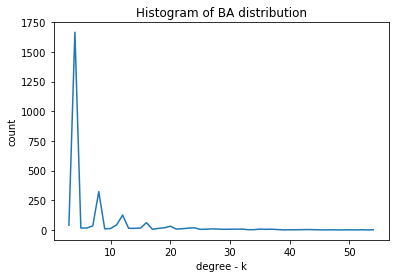

In [162]:
#Plot degree-distribution on linear scale
hist, bins = np.histogram(degree_sequence, bins=range(dmin,dmax+1))
plt.plot(bins[0:len(bins)-1],hist,'-')
plt.xlabel('degree - k')
plt.ylabel('count')
plt.title('Histogram of BA distribution')
plt.plot
plt.savefig('Histogram.png')
plt.show()

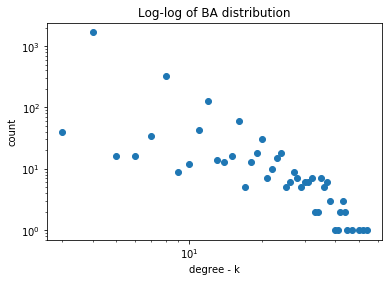

In [38]:
#Plot degree-distribution on logarithmic scale
plt.plot(bins[0:len(bins)-1],hist,'o')
plt.xlabel('degree - k')
plt.ylabel('count')
plt.title('Log-log of BA distribution')

plt.xscale('log')
plt.yscale('log')

plt.show()

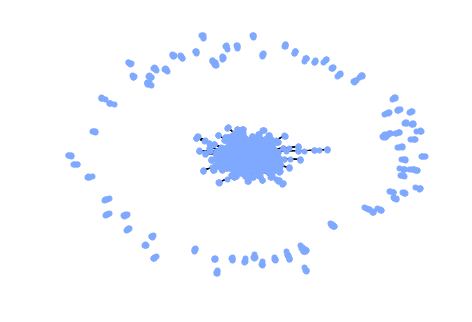

In [161]:
#Plot the graph
nx.draw(G, node_size=25, with_labels=False, node_color='#7FA8FF')
plt.show()

In [40]:
nx.degree(G)

{'Andy Goddard': 4,
 'Alex Karpovsky': 4,
 'Jacki Weaver': 4,
 'John Krasinski': 8,
 'Liev Schreiber': 20,
 'Rasmus Hardiker': 4,
 'Jemima West': 4,
 'Nick Swardson': 4,
 'Kristen Stewart': 26,
 'Anil Kapoor': 4,
 'Ari Graynor': 4,
 'Andrew Scott': 18,
 'Francis Lawrence': 9,
 'Christopher Meyer': 4,
 'Werner Herzog': 8,
 'Annika Wedderkopp': 4,
 'Henry Thomas': 4,
 'Barbara Crampton': 4,
 'Amy Ryan': 16,
 'Alfred Molina': 12,
 'Anthony Mackie': 20,
 'Oona Chaplin': 4,
 'Adam Leon': 4,
 'Mark Chao': 4,
 'Kaya Scodelario': 5,
 'Mindy Kaling': 4,
 'Jonah Hill': 31,
 'Dakota Fanning': 11,
 'Kevin Dillon': 4,
 'Jason Schwartzman': 8,
 'James Gandolfini': 4,
 'Robert Pattinson': 18,
 'Sally Hawkins': 8,
 'Arturo Castro': 4,
 'Fabio Guaglione': 4,
 'Jared Gilman': 4,
 'Kirk Jones': 8,
 'Michael C. Hall': 4,
 'Neil Flynn': 4,
 'Camille Cottin': 3,
 'Ian McKellen': 18,
 'Catherine Hardwicke': 4,
 'Bee Vang': 3,
 'Elena Anaya': 4,
 'Pen\xc3\xa9lope Cruz': 14,
 'Michael Constantine': 4,
 'Jonath

In [229]:
#Find the top10 node with the highest degree
import operator

connections=[]
sorted_x = sorted(nx.degree(G).items(), key=operator.itemgetter(1),reverse=True)
sorted_x[:10]
for n in sorted_x[:10]:
    connections.append(n)
connections

[('Hugh Jackman', 55),
 ('Mark Wahlberg', 52),
 ('Brad Pitt', 50),
 ('Christian Bale', 47),
 ('Tom Hardy', 45),
 ('Channing Tatum', 44),
 ('Anne Hathaway', 44),
 ('Chlo\xc3\xab Grace Moretz', 43),
 ('Jake Gyllenhaal', 43),
 ('Cate Blanchett', 43)]

In [42]:
print "The average degree is %f" % np.average(nx.degree(G).values())
print "The median  degree is %d" % np.median(nx.degree(G).values())

The average degree is 7.300424
The median  degree is 4


In [230]:
#Calculate the combined revenue of every movie where the actor was between the "actors"
revenuePerActor=[]
counter=0
for n in uniqueActors:
    s=0
    revenuePerActor.append([])
    for m in movies:
        if n in m[5]:
            if m[10]!='':
                s+=int(float(m[10]))
    revenuePerActor[counter].append(s)          
    revenuePerActor[counter].append(n)
    counter +=1
revenueList=sorted(revenuePerActor, reverse=True)
revenueList

[[3143, 'Robert Downey Jr.'],
 [2189, 'Jennifer Lawrence'],
 [1944, 'Chris Evans'],
 [1870, 'Scarlett Johansson'],
 [1786, 'Johnny Depp'],
 [1692, 'Shia LaBeouf'],
 [1650, 'Christian Bale'],
 [1641, 'Anne Hathaway'],
 [1640, 'Liam Hemsworth'],
 [1593, 'Dwayne Johnson'],
 [1576, 'Josh Hutcherson'],
 [1540, 'Zoe Saldana'],
 [1530, 'Chris Pratt'],
 [1490, 'Mark Wahlberg'],
 [1488, 'Bradley Cooper'],
 [1460, 'Hugh Jackman'],
 [1395, 'Will Smith'],
 [1385, 'Emma Watson'],
 [1375, 'Jeremy Renner'],
 [1354, 'Vin Diesel'],
 [1312, 'Domhnall Gleeson'],
 [1304, 'Ian McKellen'],
 [1289, 'Cate Blanchett'],
 [1279, 'Daniel Radcliffe'],
 [1274, 'Leonardo DiCaprio'],
 [1267, 'Rupert Grint'],
 [1231, 'Kristen Stewart'],
 [1219, 'Matt Damon'],
 [1216, 'Sam Worthington'],
 [1196, 'Josh Duhamel'],
 [1195, 'Michelle Rodriguez'],
 [1190, 'Chris Hemsworth'],
 [1187, 'Sandra Bullock'],
 [1171, 'Jason Bateman'],
 [1142, 'Amy Adams'],
 [1113, 'Gwyneth Paltrow'],
 [1108, 'Tyrese Gibson'],
 [1103, 'Emma Stone'],

In [232]:
#Calculate the combined revenue of every movie which the director directed
revenuePerDirector=[]
counter=0
for n in uniqueDirectors:
    s=0
    revenuePerDirector.append([])
    for m in movies:
        if n in m[4]:
            if m[10]!='':
                s+=int(float(m[10]))
    revenuePerDirector[counter].append(s)
    revenuePerDirector[counter].append(n)
    counter +=1
sorted(revenuePerDirector,reverse=True)

[[1680, 'J.J. Abrams'],
 [1627, 'David Yates'],
 [1513, 'Christopher Nolan'],
 [1418, 'Michael Bay'],
 [1298, 'Francis Lawrence'],
 [1081, 'Joss Whedon'],
 [1025, 'Jon Favreau'],
 [974, 'Zack Snyder'],
 [859, 'Peter Jackson'],
 [829, 'Gore Verbinski'],
 [822, 'Justin Lin'],
 [782, 'Andrew Stanton'],
 [760, 'James Cameron'],
 [732, 'Gareth Edwards'],
 [716, 'Ridley Scott'],
 [667, 'Anthony Russo'],
 [658, 'Clint Eastwood'],
 [652, 'Colin Trevorrow'],
 [648, 'Pete Docter'],
 [642, 'James Wan'],
 [626, 'Steven Spielberg'],
 [619, 'Pierre Coffin'],
 [588, 'Bryan Singer'],
 [586, 'Phil Lord'],
 [573, 'Bill Condon'],
 [570, 'Sam Raimi'],
 [566, 'Paul Feig'],
 [552, 'Tim Burton'],
 [526, 'Sam Mendes'],
 [525, 'David Fincher'],
 [509, 'Peter Berg'],
 [508, 'Brad Bird'],
 [498, 'Dennis Dugan'],
 [496, 'Paul Greengrass'],
 [496, 'Marc Webb'],
 [455, 'Martin Scorsese'],
 [450, 'David Ayer'],
 [445, 'Guy Ritchie'],
 [444, 'Shane Black'],
 [437, 'Adam McKay'],
 [435, 'John Lasseter'],
 [432, 'Kenne

In [234]:
#Calculate the average rating forthe movies that the director directed
ratingPerDirector=[]
counter=0
for n in uniqueDirectors:
    s=0.0
    k=0
    ratingPerDirector.append([])
    for m in movies:
        if n in m[4]:
            if m[8]!='':
                s+=float(m[8])
                k+=1
    ratingPerDirector[counter].append(round((s/k),2)) 
    ratingPerDirector[counter].append(n)    
    counter +=1
sorted(ratingPerDirector,reverse=True)

[[8.8, 'Nitesh Tiwari'],
 [8.68, 'Christopher Nolan'],
 [8.6, 'Olivier Nakache'],
 [8.6, 'Makoto Shinkai'],
 [8.5, 'Florian Henckel von Donnersmarck'],
 [8.5, 'Aamir Khan'],
 [8.4, 'Naoko Yamada'],
 [8.4, 'Damien Chazelle'],
 [8.3, 'Thomas Vinterberg'],
 [8.3, 'S.S. Rajamouli'],
 [8.3, 'Rajkumar Hirani'],
 [8.3, 'Lee Unkrich'],
 [8.3, 'Amber Tamblyn'],
 [8.25, 'Pete Docter'],
 [8.2, 'Lenny Abrahamson'],
 [8.2, 'Juan Jos\xc3\xa9 Campanella'],
 [8.1, 'Tom McCarthy'],
 [8.1, 'Garth Davis'],
 [8.1, 'Dami\xc3\xa1n Szifron'],
 [8.1, 'Chan-wook Park'],
 [8.1, 'Byron Howard'],
 [8.0, 'Tim Miller'],
 [8.0, 'Stephen Chbosky'],
 [8.0, 'Spike Jonze'],
 [8.0, 'Mel Gibson'],
 [8.0, 'Dean DeBlois'],
 [8.0, 'Asghar Farhadi'],
 [7.92, 'Martin Scorsese'],
 [7.9, 'Wes Anderson'],
 [7.9, 'Travis Knight'],
 [7.9, 'Taika Waititi'],
 [7.9, 'Quentin Tarantino'],
 [7.9, 'Oriol Paulo'],
 [7.9, 'Matt Ross'],
 [7.9, 'Kenneth Lonergan'],
 [7.9, 'Ken Loach'],
 [7.9, 'Jaco Van Dormael'],
 [7.9, 'Dan Gilroy'],
 [7.85

In [235]:
#Calculate the average rating forthe movies in wich the actor acted
ratingPerActor=[]
counter=0
for n in uniqueActors:
    s=0.0
    k=0
    ratingPerActor.append([])
    for m in movies:
        if n in m[5]:
            if m[8]!='':
                s+=float(m[8])
                k+=1
            else:
                s=0
                k=1
    ratingPerActor[counter].append(round((s/k),2))          
    ratingPerActor[counter].append(n)
    counter +=1
ratingList=sorted(ratingPerActor, reverse=True)
ratingList

[[8.8, 'Sanya Malhotra'],
 [8.8, 'Sakshi Tanwar'],
 [8.8, 'Fatima Sana Shaikh'],
 [8.6, 'Ry\xc3\xbbnosuke Kamiki'],
 [8.6, 'Ry\xc3\xb4 Narita'],
 [8.6, 'Mone Kamishiraishi'],
 [8.6, 'Mackenzie Foy'],
 [8.6, 'Fran\xc3\xa7ois Cluzet'],
 [8.6, 'Audrey Fleurot'],
 [8.6, 'Anne Le Ny'],
 [8.5, 'Ulrich Tukur'],
 [8.5, 'Ulrich M\xc3\xbche'],
 [8.5, 'Tanay Chheda'],
 [8.5, 'Sebastian Koch'],
 [8.5, 'Sachet Engineer'],
 [8.5, 'Paul Reiser'],
 [8.5, 'Melissa Benoist'],
 [8.5, 'Martina Gedeck'],
 [8.5, 'Jack Nicholson'],
 [8.5, 'Darsheel Safary'],
 [8.5, 'Aoi Yuki'],
 [8.48, 'Aamir Khan'],
 [8.4, 'Sharman Joshi'],
 [8.4, 'Saori Hayami'],
 [8.4, 'Mona Singh'],
 [8.4, 'Miyu Irino'],
 [8.4, 'Madhavan'],
 [8.4, 'Kerry Washington'],
 [8.4, 'Kensh\xc3\xb4 Ono'],
 [8.4, 'Jeff Garlin'],
 [8.4, 'Fred Willard'],
 [8.4, 'Elissa Knight'],
 [8.4, 'Ben Burtt'],
 [8.3, 'Tim Allen'],
 [8.3, 'Thomas Bo Larsen'],
 [8.3, 'Tamannaah Bhatia'],
 [8.3, 'Rosemarie DeWitt'],
 [8.3, 'Rana Daggubati'],
 [8.3, 'Prabhas'],
 [

In [236]:
TOP10=['Hugh Jackman',
 'Mark Wahlberg',
 'Brad Pitt',
 'Christian Bale',
 'Tom Hardy',
 'Channing Tatum',
 'Anne Hathaway',
 'Chlo\xc3\xab Grace Moretz',
 'Jake Gyllenhaal',
 'Cate Blanchett']

In [237]:
#Find the index of the TOP10actors
TOP10ActorIndex=[]
for n in TOP10:
     TOP10ActorIndex.append(uniqueActors.index(n))
TOP10ActorIndex

[1118, 1167, 1571, 341, 445, 249, 580, 180, 557, 1923]

In [257]:
#Find the revenue of the TOP10actors
a=[]
for n in TOP10ActorIndex:
    a.append(revenuePerActor[n][0])
    print revenuePerActor[n]

[1460, 'Hugh Jackman']
[1490, 'Mark Wahlberg']
[1090, 'Brad Pitt']
[1650, 'Christian Bale']
[925, 'Tom Hardy']
[951, 'Channing Tatum']
[1641, 'Anne Hathaway']
[468, 'Chlo\xc3\xab Grace Moretz']
[405, 'Jake Gyllenhaal']
[1289, 'Cate Blanchett']


In [239]:
#Find the rank of the revenue of the TOP10actors
revenueRank=[]
for n in TOP10:
    for m in revenueList:
        if n==m[1]:
            revenueRank.append(revenueList.index(m)+1)
revenueRank

[16, 14, 40, 7, 60, 54, 8, 166, 200, 23]

In [255]:
#Find the rating of the TOP10actors
b=[]
for n in TOP10ActorIndex:
    b.append(ratingPerActor[n][0])
    print ratingPerActor[n]

[7.14, 'Hugh Jackman']
[6.77, 'Mark Wahlberg']
[7.48, 'Brad Pitt']
[7.25, 'Christian Bale']
[7.36, 'Tom Hardy']
[6.31, 'Channing Tatum']
[6.98, 'Anne Hathaway']
[6.7, 'Chlo\xc3\xab Grace Moretz']
[7.36, 'Jake Gyllenhaal']
[7.05, 'Cate Blanchett']


In [256]:
#Find the rank of the rating of the TOP10actors
ratingRank=[]
for n in TOP10:
    for m in ratingList:
        if n==m[1]:
            ratingRank.append(ratingList.index(m)+1)
ratingRank

[610, 965, 366, 517, 426, 1324, 775, 1057, 429, 703]

In [242]:
#Find number of movies of the TOP10actors
for n in TOP10:
    for m in mostCommon:
        if n==m[0]:
            print m

('Hugh Jackman', 14)
('Mark Wahlberg', 15)
('Brad Pitt', 13)
('Christian Bale', 13)
('Tom Hardy', 12)
('Channing Tatum', 12)
('Anne Hathaway', 12)
('Chlo\xc3\xab Grace Moretz', 11)
('Jake Gyllenhaal', 11)
('Cate Blanchett', 11)


In [243]:
mostMovies=[]
for n in mostCommon:
    mostMovies.append(n)

In [244]:
#Find the rank of the number of movies of the TOP10actors
movieNumRank=[]
for n in TOP10:
    for m in mostMovies:
        if n==m[0]:
            movieNumRank.append(mostMovies.index(m)+1)
movieNumRank

[2, 1, 4, 3, 8, 7, 9, 12, 13, 20]

In [245]:
#Number of movies of the TOP10actors for correlation calculation
movieNum=[]
for n in TOP10:
    for m in mostMovies:
        if n==m[0]:
            movieNum.append(m[1])
movieNum

[14, 15, 13, 13, 12, 12, 12, 11, 11, 11]

In [261]:
#orrelation calculation
import numpy

connectionsOnlyValue=[]
for n in connections:
    connectionsOnlyValue.append(n[1])
    
print numpy.corrcoef(connectionsOnlyValue,a) 
print numpy.corrcoef(connectionsOnlyValue,b)
print numpy.corrcoef(connectionsOnlyValue,movieNum)

[[ 1.          0.49645551]
 [ 0.49645551  1.        ]]
[[ 1.          0.18145049]
 [ 0.18145049  1.        ]]
[[ 1.          0.91118879]
 [ 0.91118879  1.        ]]


In [43]:
#import library forsentiment analysis
import pandas as pd
ref = pd.read_csv('Data_Set_S1.txt', skiprows=range(1,3), header = 1,delimiter="\t")
scores = {word:score for word,score in ref[['word','happiness_average']].values}

In [262]:
#Define function that calculates sentiment
import nltk
def sent_calculator(token_list, normalize=False):
   
    # exclude numbers and punctuation and set everything to lowercase
    if normalize==True:
        token_list = [w.lower() for w in token_list if w.isalpha()]
    
    total_score=0
    number_of_sent_words=0
    
    for word in token_list: 
        
        if word in scores:
            
            total_score+=scores[word]
            number_of_sent_words+= 1
        
    if total_score==0:
        print 'There are no words with sentiment attached in the input'
        
        return -1
    
    else:
        
        return total_score/number_of_sent_words # Divide by number of tokens in the sentiment list

In [45]:
#Find all genres
genres=[]

for n in movies:
    genresPerMovie=n[2].split(',')
    genres+=genresPerMovie
uniqueGenres=[]
for n in set(genres):
    uniqueGenres.append(n)
uniqueGenres

['Mystery',
 'Romance',
 'History',
 'Sport',
 'Sci-Fi',
 'Family',
 'Horror',
 'Musical',
 'Crime',
 'Drama',
 'Fantasy',
 'War',
 'Animation',
 'Music',
 'Adventure',
 'Action',
 'Comedy',
 'Western',
 'Thriller',
 'Biography']

In [47]:
#Categorize every description to genres
descriptionPerGenre=[]
counter=0
for n in uniqueGenres:
    descriptionPerGenre.append([])
    for m in movies:
        if n in m[2]:
            descriptionPerGenre[counter].append(m[3])
    counter+=1
descriptionPerGenre

[['Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.',
  'When twelve mysterious spacecraft appear around the world, linguistics professor Louise Banks is tasked with interpreting the language of the apparent alien visitors.',
  'A father and son, both coroners, are pulled into a complex mystery while attempting to identify the body of a young woman, who was apparently harboring dark secrets.',
  'A divorcee becomes entangled in a missing persons investigation that promises to send shockwaves throughout her life.',
  'Two stage magicians engage in competitive one-upmanship in an attempt to create the ultimate stage illusion.',
  "With his wife's disappearance having become the focus of an intense media circus, a man sees the spotlight turned on him when it's suspected that he may not be innocent.",
  'In the dead of a Wyoming winter, a bounty hunter and his prisoner find shelter in a cabin currently inhabited

In [223]:
#Calculate the sentiment of each description
allSentiment=[]
for n in descriptionPerGenre:
    for m in n:
        tokens=nltk.word_tokenize(m)
        tokens
        allSentiment.append(sent_calculator(tokens, normalize=True))
print min(allSentiment)

print max(allSentiment)

4.465
6.156


In [50]:
#Calculate description per genre
for n in descriptionPerGenre:
    sentiment=0.0
    Sent=0.0
    for m in n:
        tokens=nltk.word_tokenize(m)
        sentiment+=sent_calculator(tokens, normalize=True)
    Sent=sentiment/len(n)
    print Sent
        

5.39009341835
5.53820261377
5.30237178395
5.45917185252
5.32399246736
5.49206233028
5.3956624019
5.52808915115
5.30720557243
5.43055151538
5.38268013191
5.31973891059
5.47400623235
5.6066181677
5.36212119965
5.29415461776
5.5119887706
5.37630385488
5.34913690876
5.41268360721


In [51]:
sentimentPerMovie=[]
for n in movies:
    tokens=nltk.word_tokenize(n[3])
    sentimentPerMovie.append(sent_calculator(tokens, normalize=True))

In [52]:
#Find the index of the movie with the lowest sentiment score
[i for i,x in enumerate(sentimentPerMovie) if x == max(sentimentPerMovie)]

[108]

In [53]:
#movie with the lowest sentiment score
movies[108]

['109',
 'All We Had',
 'Drama',
 'A mother struggles to make a better life for her daughter.',
 'Katie Holmes',
 'Eve Lindley,Richard Kind,Mark Consuelos,Katherine Reis',
 '2016',
 '105',
 '5.8',
 '1004',
 '',
 '48']

In [54]:
#Find the index of the movie with the highest sentiment score
[i for i,x in enumerate(sentimentPerMovie) if x == min(sentimentPerMovie)]

[51]

In [55]:
#movie with the highest sentiment score
movies[51]

['52',
 'Underworld: Blood Wars',
 'Action,Adventure,Fantasy',
 'Vampire death dealer, Selene (Kate Beckinsale) fights to end the eternal war between the Lycan clan and the Vampire faction that betrayed her.',
 'Anna Foerster',
 'Kate Beckinsale,Theo James,Tobias Menzies,Lara Pulver',
 '2016',
 '91',
 '5.8',
 '41362',
 '30.35',
 '23']

In [225]:
#Concatenate every description per genre
a=[]
for n in descriptionPerGenre:
    string=''
    for m in n:
        string+=m
    a.append(string)
a[0]

'Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.When twelve mysterious spacecraft appear around the world, linguistics professor Louise Banks is tasked with interpreting the language of the apparent alien visitors.A father and son, both coroners, are pulled into a complex mystery while attempting to identify the body of a young woman, who was apparently harboring dark secrets.A divorcee becomes entangled in a missing persons investigation that promises to send shockwaves throughout her life.Two stage magicians engage in competitive one-upmanship in an attempt to create the ultimate stage illusion.With his wife\'s disappearance having become the focus of an intense media circus, a man sees the spotlight turned on him when it\'s suspected that he may not be innocent.In the dead of a Wyoming winter, a bounty hunter and his prisoner find shelter in a cabin currently inhabited by a collection of nefarious charac

Mystery


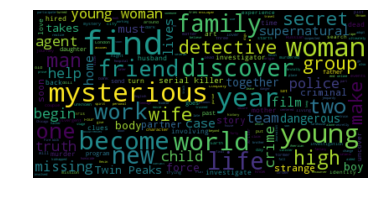

Romance


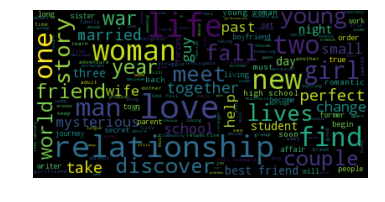

History


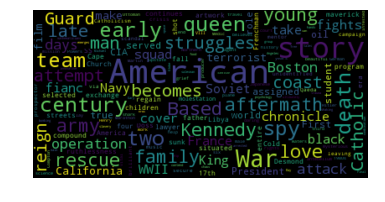

Sport


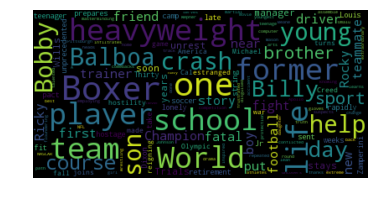

Sci-Fi


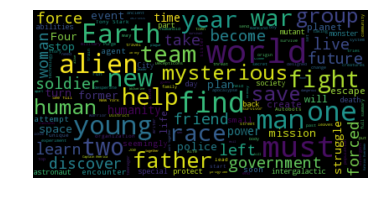

Family


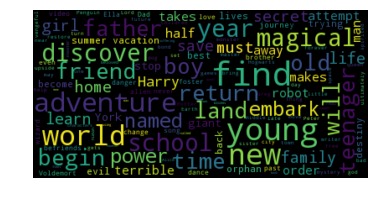

Horror


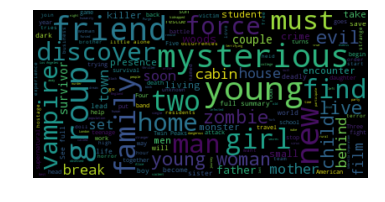

Musical


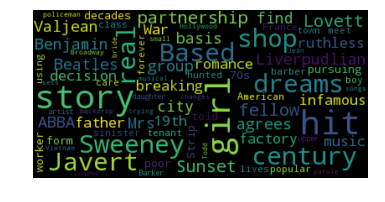

Crime


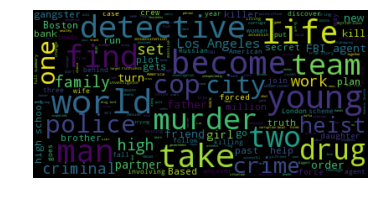

Drama


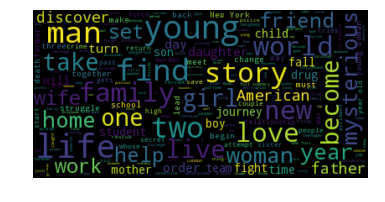

Fantasy


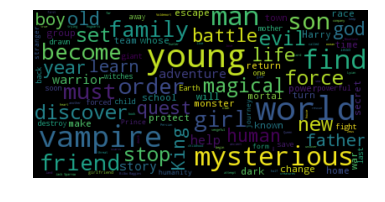

War


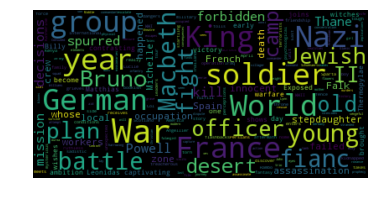

Animation


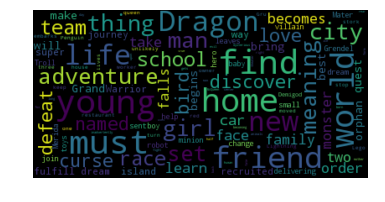

Music


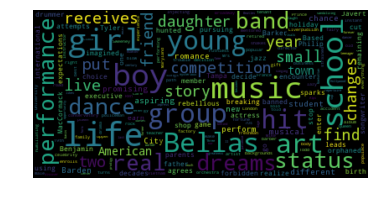

Adventure


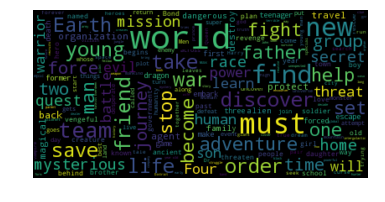

Action


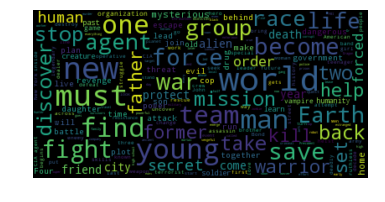

Comedy


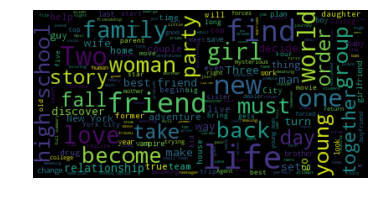

Western


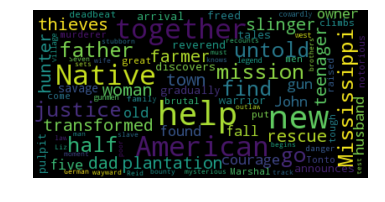

Thriller


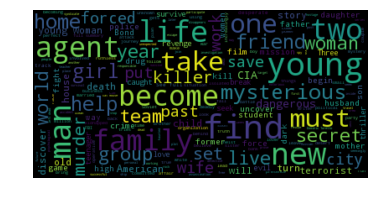

Biography


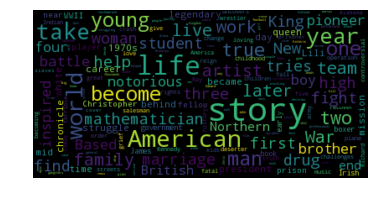

In [227]:
#Create word cloud for each genre
from wordcloud import WordCloud
c=0
for n in a:
# Read the whole text.
    print uniqueGenres[c]
    text = n

    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    # the matplotlib way:

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    #plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(uniqueGenres[c]+'.png')
    c+=1
    plt.show()